<a href="https://colab.research.google.com/github/Saad-7275/Saad-7275/blob/main/Iris_dataset_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
iris = load_iris()

In [ ]:
x = iris.data
y = iris.target


In [ ]:
df = pd.DataFrame(x)
print(iris.feature_names)
df.columns = iris.feature_names
df.describe()


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:


x = df['sepal width (cm)'].values.reshape(-1,1)
y = df['sepal length (cm)']

In [ ]:
from sklearn import model_selection
x_train,x_test, y_train, y_test = model_selection.train_test_split(x,y)

In [ ]:
from sklearn.linear_model import LinearRegression
alg1 = LinearRegression()
alg1.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_predict_train = alg1.predict(x_train)
training_score = alg1.score(x_train, y_train)

y_predict_test = alg1.predict(x_test)
testing_score = alg1.score(x_test, y_test)

print(training_score , testing_score)

0.005808016736157384 -0.010679480724592683


In [ ]:
np.corrcoef(df['sepal length (cm)'], df['sepal width (cm)'])

array([[ 1.        , -0.11756978],
       [-0.11756978,  1.        ]])

In [ ]:
m = alg1.coef_
c = alg1.intercept_
print(m)
print(c)

[-0.14234455]
6.317828462669511


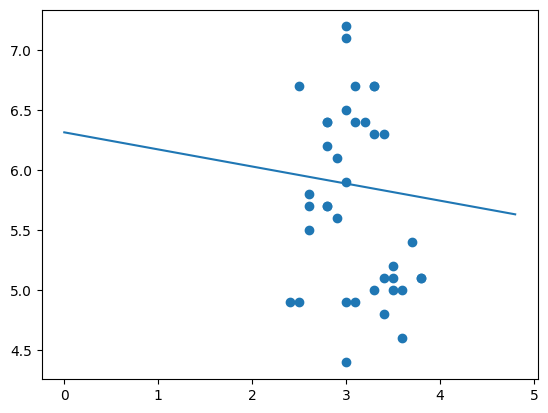

In [ ]:
x_line = np.arange(0,5,0.2)
y_line = m* x_line + c
plt.plot(x_line, y_line)

plt.scatter(x_test, y_test)
plt.show()

**Writing the functions explicitly rather than using the in-built functions to determine the Best-fit line, y-predict value, score and the cost function**

In [ ]:
def fit(x_train, y_train):
  num = (x_train * y_train).mean() - x_train.mean() * y_train.mean()
  den = (x_train ** 2).mean() - (x_train.mean())**2

  m = num / den

  c = y_train.mean() - m*x_train.mean()

  return m,c

def predict(x,m,c):
  return m*x + c

def score(y_truth, y_predict):
  U = ((y_truth - y_predict)**2).sum()
  V = ((y_truth - y_truth.mean())**2).sum()

  return 1 - U/V

def cost(x,y,m,c):
  return ((y-m*x +c)**2).sum()

In [ ]:
M,C = fit(x_train, y_train)

y_predict_train = predict(x_train, M,C)

training_score = score(y_train, y_predict_train)

training_cost = cost(x_train, y_train, M,C)

print(M,C)

print(training_score)

print(training_cost)

ValueError: ignored

**Adding New Features into a data frame and try to see whether the score and the cost function improves or not**

In [ ]:
df

In [ ]:
df['sepal_length_sepal_length (cm)'] = df['sepal length (cm)']	**2

df
df['sepal_width_squared'] = df['sepal width (cm)']**2

df['petal_length_squared'] = df['petal length (cm)']**2

df['petal_width_squared'] = df['petal width (cm)']**2

df

df['sepal_petal_length'] = df['sepal length (cm)'] * df['petal length (cm)']
df['sepal_L_petal_W'] = df['sepal length (cm)'] * df['petal width (cm)']
df['sepal_W_petal_L'] = df['sepal width (cm)'] * df['petal length (cm)']
df['sepal_petal_width'] = df['sepal width (cm)'] * df['petal width (cm)']
df['sepal_L_W'] = df['sepal length (cm)'] * df['sepal width (cm)']
df['petal_L_W'] = df['petal length (cm)'] * df['petal width (cm)']

df.shape
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sepal_length_sepal_length (cm),sepal_width_squared,petal_length_squared,petal_width_squared,sepal_petal_length,sepal_L_petal_W,sepal_W_petal_L,sepal_petal_width,sepal_L_W,petal_L_W
0,5.1,3.5,1.4,0.2,26.01,12.25,1.96,0.04,7.14,1.02,4.90,0.70,17.85,0.28
1,4.9,3.0,1.4,0.2,24.01,9.00,1.96,0.04,6.86,0.98,4.20,0.60,14.70,0.28
2,4.7,3.2,1.3,0.2,22.09,10.24,1.69,0.04,6.11,0.94,4.16,0.64,15.04,0.26
3,4.6,3.1,1.5,0.2,21.16,9.61,2.25,0.04,6.90,0.92,4.65,0.62,14.26,0.30
4,5.0,3.6,1.4,0.2,25.00,12.96,1.96,0.04,7.00,1.00,5.04,0.72,18.00,0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,44.89,9.00,27.04,5.29,34.84,15.41,15.60,6.90,20.10,11.96
146,6.3,2.5,5.0,1.9,39.69,6.25,25.00,3.61,31.50,11.97,12.50,4.75,15.75,9.50
147,6.5,3.0,5.2,2.0,42.25,9.00,27.04,4.00,33.80,13.00,15.60,6.00,19.50,10.40
148,6.2,3.4,5.4,2.3,38.44,11.56,29.16,5.29,33.48,14.26,18.36,7.82,21.08,12.42


In [ ]:
x2 = df.values
x2.shape

(150, 14)

In [ ]:
from sklearn import model_selection
x_train,x_test, y_train, y_test = model_selection.train_test_split(x,y,random_state = 0)

x2_train, x2_test, y2_train, y2_test = model_selection.train_test_split(x2,y, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
alg1 = LinearRegression()
alg1.fit(x_train, y_train)

alg2 = LinearRegression()
alg2.fit(x2_train, y2_train)

LinearRegression()

In [ ]:
y_predict_train = alg1.predict(x_train)
training_score = alg1.score(x_train, y_train)

y_predict_test = alg1.predict(x_test)
testing_score = alg1.score(x_test, y_test)

print(training_score , testing_score,"\n")

y2_predict_train = alg2.predict(x2_train)
training_score_2 = alg2.score(x2_train, y2_train)

y2_predict_test = alg2.predict(x2_test)
testing_score_2 = alg2.score(x2_test, y2_test)

print("\n",training_score_2, testing_score_2)

0.0030042585383248666 -0.018098850527370702 


 1.0 1.0


(150, 14)